In [1]:
%matplotlib inline
import numpy as np
import healpy as hp
from lsst.sims.skybrightness_pre import M5percentiles, SkyModelPre, conditions2m5

/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
sm = SkyModelPre()

In [3]:
mjd = sm.info['mjds'][10]

/Users/yoachim/gitRepos/sims_skybrightness_pre/python/lsst/sims/skybrightness_pre/SkyModelPre.py:221: RuntimeWarning: invalid value encountered in multiply
  sbs[filter_name] = self.sb[filter_name][left, :] * w1 + self.sb[filter_name][right, :] * w2
/Users/yoachim/lsst/DarwinX86/healpy/1.8.1.lsst2+4/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/pixelfunc.py:252: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/numpy/ma/core.py:2255: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsst/DarwinX86/healpy/1.8.1.lsst2+4/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/projaxes.py:996: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsst/DarwinX86/healpy/1.8.1.lsst2+4/lib/python/healpy-1.8.1

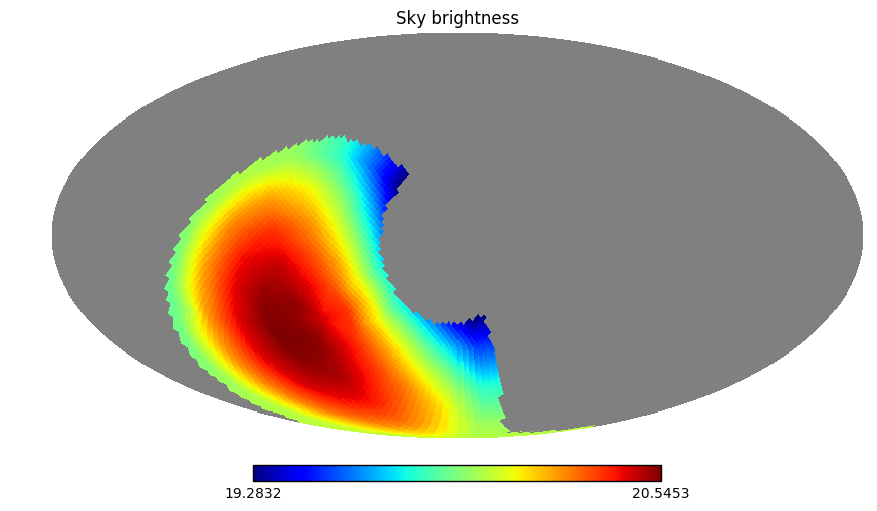

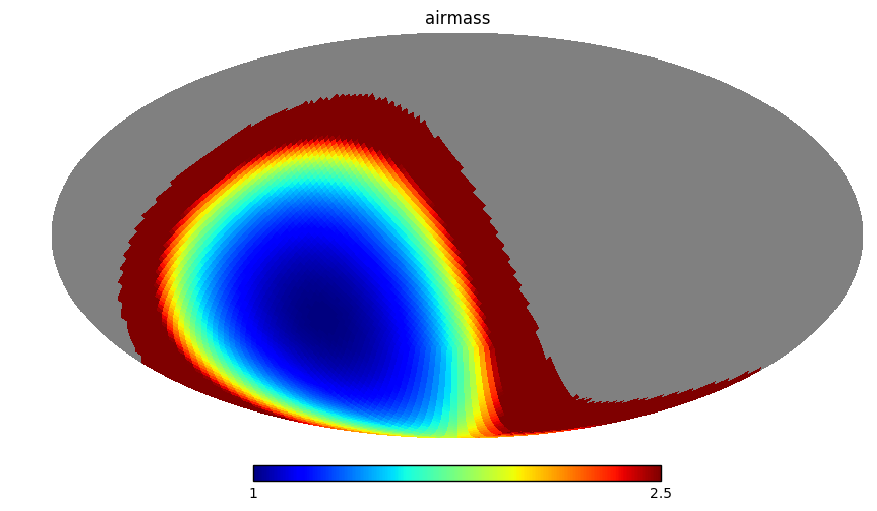

In [4]:
filtername = 'g'
sb = sm.returnMags(mjd)
am = sm.returnAirmass(mjd)
mask = np.where((am > 2.5) | (sb[filtername] == hp.UNSEEN))[0]
sb[filtername][mask] = hp.UNSEEN
hp.mollview(sb[filtername], title='Sky brightness')
hp.mollview(am, title='airmass', min=1, max=2.5)

In [5]:
m5map = conditions2m5(0.7, sb[filtername], am, filtername=filtername)
m5map[mask] = hp.UNSEEN
m5map[np.isnan(m5map)] = hp.UNSEEN

Filter FWHMeff FWHMgeom SkyMag SkyCounts Zp_t Tb Sb kAtm Gamma Cm dCm_infinity m5 SourceCounts
u 0.92 0.81 22.95 50.2 26.50 0.022 0.036 0.5041 0.038061 22.74 0.75 23.42 515.65
g 0.87 0.77 22.24 387.6 28.30 0.118 0.143 0.2097 0.038717 24.38 0.19 24.77 779.37
r 0.83 0.73 21.20 796.2 28.13 0.100 0.113 0.1263 0.038978 24.43 0.10 24.34 978.88
i 0.80 0.71 20.47 1108.1 27.79 0.074 0.080 0.0962 0.039078 24.30 0.07 23.89 1085.04
z 0.78 0.69 19.60 1687.9 27.40 0.051 0.055 0.0685 0.039216 24.15 0.05 23.33 1274.70
y 0.76 0.68 18.63 2140.8 26.58 0.024 0.029 0.1760 0.039278 23.70 0.04 22.42 1384.72


/Users/yoachim/gitRepos/sims_skybrightness_pre/python/lsst/sims/skybrightness_pre/utils.py:47: RuntimeWarning: invalid value encountered in power
  FWHMeff = airmass**(0.6) * FWHMeff_zenith


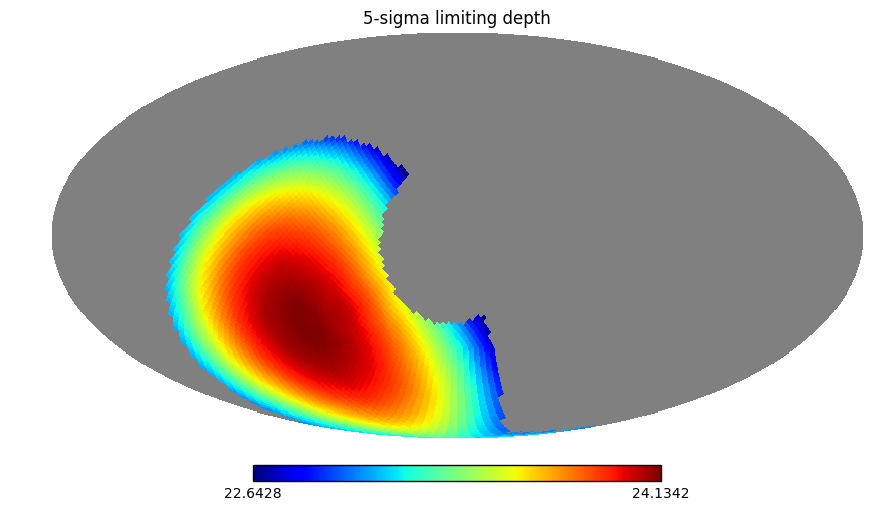

In [6]:
hp.mollview(m5map, title='5-sigma limiting depth')

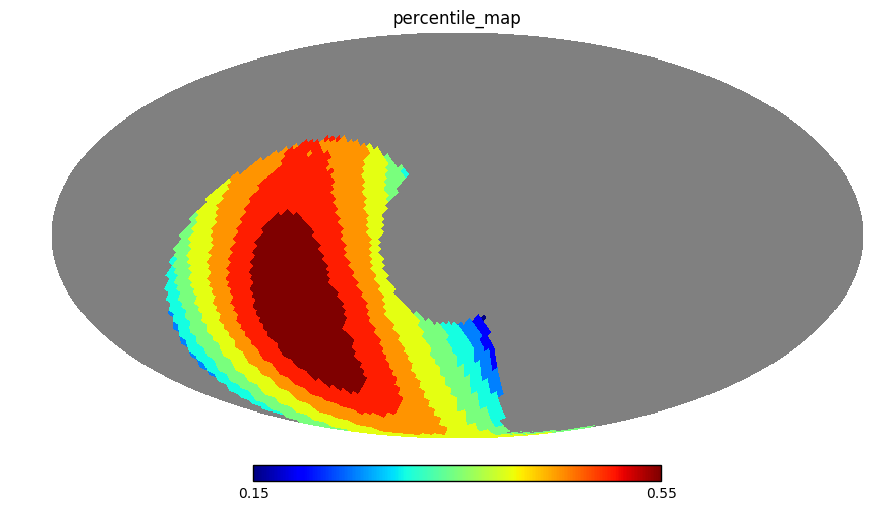

In [7]:
m5p = M5percentiles()
percentile_map = m5p.m5map2percentile(m5map, filtername=filtername)
hp.mollview(percentile_map, title='percentile_map')

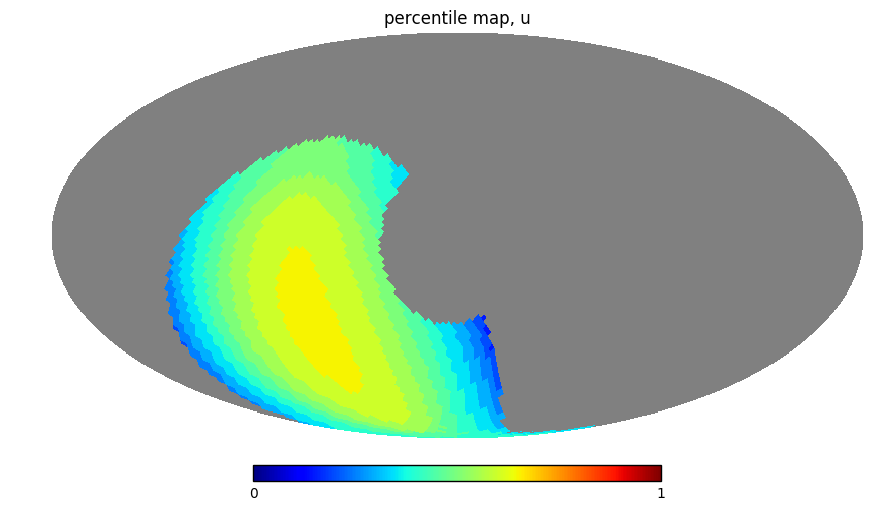

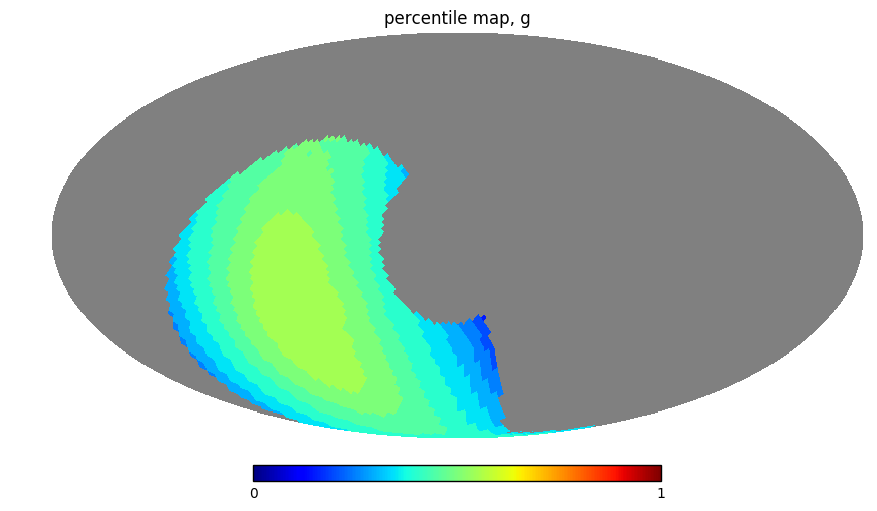

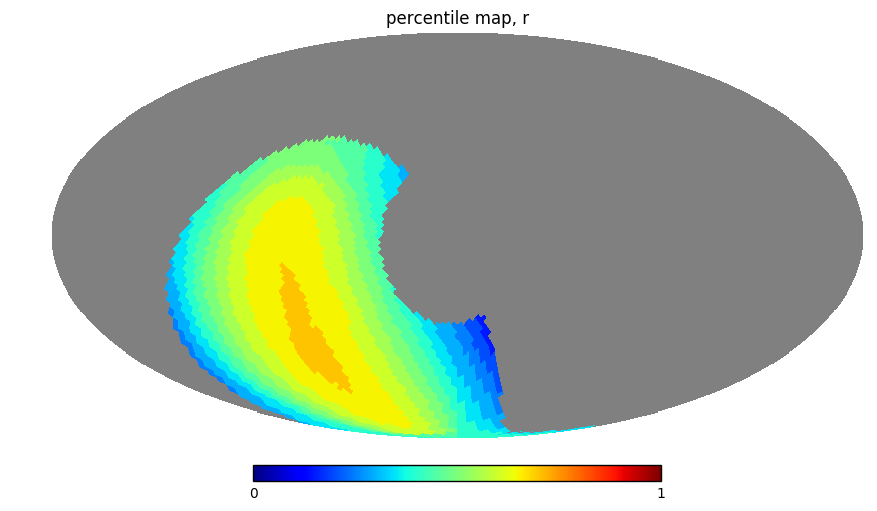

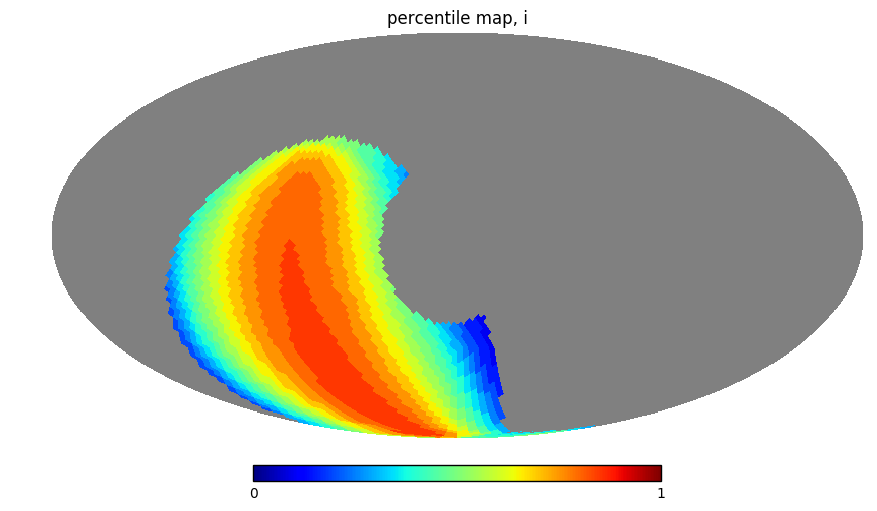

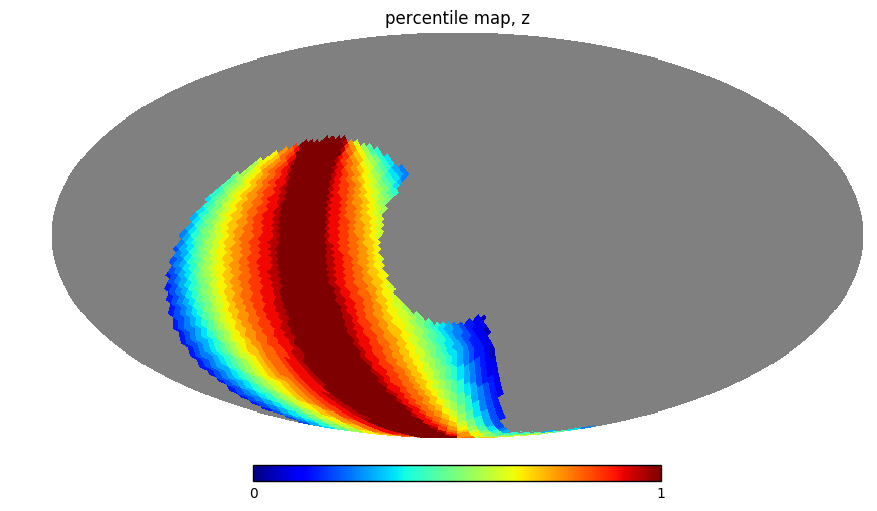

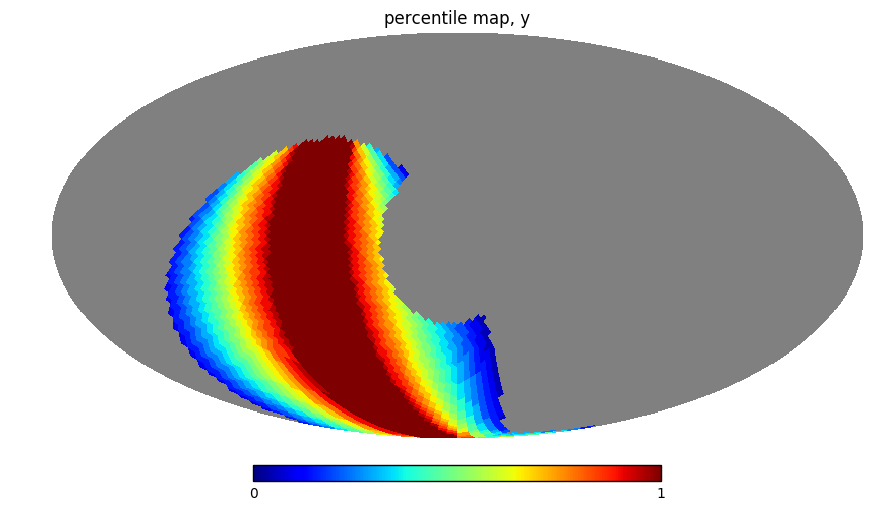

In [8]:
for filtername in ['u', 'g','r', 'i', 'z','y']:
    m5map = conditions2m5(0.7, sb[filtername], am, filtername=filtername)
    m5map[mask] = hp.UNSEEN
    m5map[np.isnan(m5map)] = hp.UNSEEN
    percentile_map = m5p.m5map2percentile(m5map, filtername=filtername)
    hp.mollview(percentile_map, title='percentile map, %s' % filtername, min=0, max=1)